# EDA on Football Data

Data Source : https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017

<b> About data : </b>
> results.csv includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- home_score - full-time home team score including extra time, not including penalty-shootouts
- away_score - full-time away team score including extra time, not including penalty-shootouts
- tournament - the name of the tournament
- city - the name of the city/town/administrative unit where the match was played
- country - the name of the country where the match was played
- neutral - TRUE/FALSE column indicating whether the match was played at a neutral venue

> shootouts.csv 
 
Winners of matches that went to a penalty-shootout

includes the following columns:

- date - date of the match
- home_team - the name of the home team
- away_team - the name of the away team
- winner - winner of the penalty-shootout

In [ ]:
project_name = "football-data-analysis"

# import essential libraries for analysis and visualisations
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


#### Download the data set from kaggle 
Mutiple ways to get the dataset 
- using requests module 
- opendatasets 
- using urlretrieve from urllib.request

In [ ]:
# Data collection 

dataset_url = 'https://www.kaggle.com/martj42/international-football-results-from-1872-to-2017'
    
import opendatasets as od
od.download(dataset_url)


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: 

In [ ]:
import os 
# os.rename('international-football-results-from-1872-to-2017','football_data')
os.listdir(".")

In [ ]:
# read the data into dataframes 
result_df = pd.read_csv("./football_data/results.csv")
shootout_df = pd.read_csv("./football_data/shootouts.csv")


###### Explore more information about the data  (Analysis)

- Size of the data set
- Columns in the data set 
- descriptive stats
- As there is data column, Time frame of data 
- nulls or NAs ?



In [ ]:
print(f"""Results data set has:
      rows: {result_df.shape[0]}  
      cols: {result_df.shape[1]} \n """, end="\n")

print(f"""Shootout data set has:
      rows: {shootout_df.shape[0]}  
      cols: {shootout_df.shape[1]} """, end="\n\n")

print("result_df: \n", result_df.head(), end="\n\n")
print("shootout_df: \n", shootout_df.head(), end="\n")




In [ ]:
# Explore Datatypes of the resultsdf

result_df.dtypes

In [ ]:
# Date column needs to be date object of python 

result_df.date = pd.to_datetime(result_df.date)
result_df.neutral = result_df['neutral'].astype(bool)

print(result_df.dtypes, end="\n\n")

print('We are dealing with {} rows of data and {} columns'.format(result_df.shape[0], result_df.shape[1]))

In [ ]:
result_df.describe().T

In [ ]:
#Time frame
print("The data records goes back to {} and up to {} \n".format(result_df.date.min(), result_df.date.max()))

# print(( result_df.date.max() - result_df.date.min())/365)
print("The time frame is {} years".format(round((result_df.date.max() - result_df.date.min()) / np.timedelta64(1, 'Y')), 2))


In [ ]:
# get nulls 
result_df.isna().sum()


In [ ]:
result_df[result_df['home_team'].isna()]
# print(result_df[result_df['away_team'].isna()])


In [ ]:
result_df[result_df['home_score'].isna()]

In [ ]:
#Any nulls?
result_df = result_df.dropna() # NO
result_df.isna().sum()

## Data Analysis on games played in home ground 

In our data set we have 75% of games played in home ground
and next 25% of matches were played in Neutal venue

- step1 will be analyse the data set for non neutal venue
- later analyse the data set for neutral venue

In [16]:
# Non Neutral, meaning played in home ground

mask_non_neutral = result_df.loc[result_df['neutral'] == False]
print(mask_non_neutral.shape)
mask_non_neutral.tail()

(32424, 9)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
43050,2021-11-30,Qatar,Bahrain,1.0,0.0,Arab Cup,Al Khor,Qatar,False
43058,2021-12-03,Qatar,Oman,2.0,1.0,Arab Cup,Al Rayyan,Qatar,False
43067,2021-12-06,Qatar,Iraq,3.0,0.0,Arab Cup,Al Khor,Qatar,False
43075,2021-12-09,Tanzania,Uganda,0.0,2.0,Friendly,Dar es Salaam,Tanzania,False
43077,2021-12-10,Qatar,United Arab Emirates,5.0,0.0,Arab Cup,Al Khor,Qatar,False


In [62]:
mask_non_neutral['home_team'].value_counts(), mask_non_neutral['away_team'].value_counts()

(England          464
 Sweden           461
 France           443
 Hungary          435
 Germany          429
                 ... 
 Madrid             1
 Central Spain      1
 Micronesia         1
 Palau              1
 Cascadia           1
 Name: home_team, Length: 265, dtype: int64,
 Sweden          472
 England         464
 Hungary         456
 Finland         404
 Germany         393
                ... 
 Felvidék          1
 Kárpátalja        1
 Somaliland        1
 Vatican City      1
 Barawa            1
 Name: away_team, Length: 294, dtype: int64)

<AxesSubplot:>

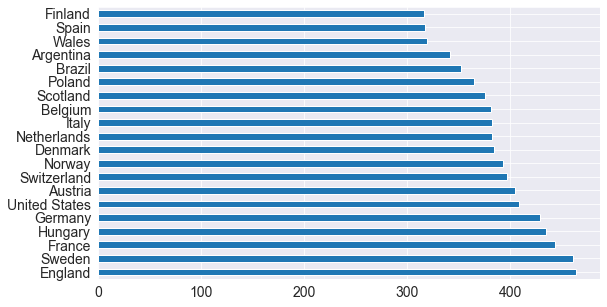

In [63]:
# Matches played in home ground of either team

mask_non_neutral['home_team'].value_counts()[:20].plot(kind='barh')

<AxesSubplot:>

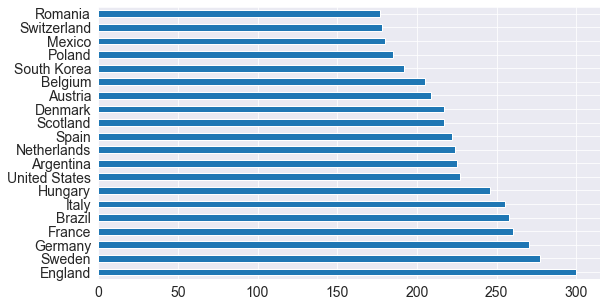

In [19]:
# seems like England has won most of the matches played in home ground. 
# 
import plotly.express as px

win_at_home = mask_non_neutral[mask_non_neutral['home_score'] > mask_non_neutral['away_score']]

win_at_home['home_team'].value_counts()[:20].plot(kind='barh')


In [ ]:
# Show Top 20 games vs wins
# Lets look at top 20 games on IFL @ home ground

import plotly.graph_objects as go


new_df = pd.DataFrame({'games':mask_non_neutral['home_team'].value_counts(), 
                       'win': win_at_home['home_team'].value_counts()}).sort_values(by=['games'], ascending = False).head(n = 20)

fig = go.Figure(data=[
    go.Bar(name='games', x=new_df.index, y=new_df['games']),
    go.Bar(name='win', x=new_df.index, y=new_df['win']) ])

# Change the bar mode
fig.update_layout(barmode='group')
fig.update_layout(title = 'Games Playes vs Won')

fig.show()

In [57]:
#Focusing more on the Goals made in each game
result_df.loc[result_df['neutral'] == False].sort_values(by = ['home_team'], ascending = True)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
38036,2016-05-29,Abkhazia,Chagos Islands,9.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,False
34607,2012-09-25,Abkhazia,Artsakh,1.0,1.0,Friendly,Sukhumi,Georgia,False
38075,2016-06-01,Abkhazia,Sápmi,2.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,False
38128,2016-06-04,Abkhazia,Northern Cyprus,2.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,False
38056,2016-05-31,Abkhazia,Western Armenia,1.0,0.0,CONIFA World Football Cup,Suhkumi,Georgia,False
...,...,...,...,...,...,...,...,...,...
31540,2009-07-03,Åland Islands,Jersey,1.0,2.0,Island Games,Mariehamn,Sweden,False
16650,1991-06-24,Åland Islands,Isle of Wight,1.0,0.0,Island Games,Åland,Finland,False
16661,1991-06-26,Åland Islands,Ynys Môn,0.0,1.0,Island Games,Åland,Finland,False
31504,2009-06-28,Åland Islands,Greenland,4.0,2.0,Island Games,Mariehamn,Sweden,False


In [94]:
# How many Goals have the teams made @ Home ground

home_goals_df = result_df.groupby(['home_team']).sum().sort_values(by =['home_score'], ascending = False)
# Teams seems doing better in their home ground
home_goals_df

,home_score,away_score
home_team,,
Brazil,1442.0,477.0
Germany,1292.0,540.0
Argentina,1227.0,483.0
England,1187.0,453.0
Sweden,1160.0,567.0
...,...,...
Vatican City,0.0,2.0
Kabylia,0.0,2.0
Manchukuo,0.0,9.0


In [101]:
# %ge of teams hitting goals in the home ground
home_goals_df['win_pec'] = home_goals_df['home_score'] / (home_goals_df['home_score']+home_goals_df['away_score'])
home_goals_df


,home_score,away_score,win_pec
home_team,,,
Brazil,1442.0,477.0,0.751433
Germany,1292.0,540.0,0.705240
Argentina,1227.0,483.0,0.717544
England,1187.0,453.0,0.723780
Sweden,1160.0,567.0,0.671685
...,...,...,...
Vatican City,0.0,2.0,0.000000
Kabylia,0.0,2.0,0.000000
Manchukuo,0.0,9.0,0.000000


In [105]:
home_goals_df['loose_pec'] = home_goals_df['away_score'] / (home_goals_df['home_score']+home_goals_df['away_score'])

# (home_goals_df['away_score'] / (home_goals_df['home_score']+home_goals_df['away_score']) ).sort_values(ascending = False)
home_goals_df[:20]

,home_score,away_score,win_pec,loose_pec
home_team,,,,
Brazil,1442.0,477.0,0.751433,0.248567
Germany,1292.0,540.0,0.705240,0.294760
Argentina,1227.0,483.0,0.717544,0.282456
England,1187.0,453.0,0.723780,0.276220
Sweden,1160.0,567.0,0.671685,0.328315
Hungary,1084.0,567.0,0.656572,0.343428
Mexico,1055.0,475.0,0.689542,0.310458
Netherlands,1023.0,440.0,0.699248,0.300752
France,1002.0,536.0,0.651495,0.348505


In [115]:
# Teams Win percentage distribution based on number of goals hit by each team
fig = go.Figure(data=[go.Pie(labels=home_goals_df.index[:20], 
                             values=home_goals_df.home_score[:20], 
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.update_layout(title="%ge win in home ground")
fig.show()


fig1 = go.Figure(data=[go.Pie(labels=home_goals_df.index[:20], 
                             values=home_goals_df.away_score[:20], 
                             textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig1.update_layout(title="%ge of other team's win")
fig1.show()

##### Observe a perticular team over the time 

To say how many times the team 
As we have Time data we can make use of it to 